## Homework1 Phys 133
Jesus Javier Serrano
7/9/18

### Note
There is an extracurricular program provided for the primes section which may take more time than usual to compile.

### Problem 1

To begin with we shall compile some warmup code. Below are a few exercises that show that basic capabilities of python.

In [1]:
print("Problem 1:")
print('')
#part a:

print("hello world")
print("part a done")
#part b:

import numpy as np
print('part b done')
#part c:

x = 5
x = x**2 - 25
print(x)
print('part c done')
#part d:

y = np.linspace(0,10)
def inp_arr(h):
    g = 'y[%s]'%h
    return g

find = ['1','0','-1','1:5','5:']
#I just set up a loop to print out the comments and arrays for me
for i in find:
    val = eval(inp_arr(i))
    print('%s represents: %s'%(inp_arr(i),val))

print('part d done')
#part e:

mask = (y>3)
print (mask)
print(y[mask])
print('result of y[y>3] as input: %s'%y[y>3])
print('part e done')
#part f:

a = np.array([0,1,2,3])
b = np.array([0,15,30,45])
print(2*a + a*b)
c = np.array([0,12,3])
try:
    2*a + a*c
except ValueError:
    print('If b has a different length than a then we reach an error since two arrays with different lengths can not be related within a function')
print("part f done")
#part g:

x = 14.35244
find = ['%d', '%.3f','%.4e','%05d']
for i in find:
    print(i%x)

print('part g done')
#part h:

def myfunc1(p):
    y = p**2
    return y
print(myfunc1(2.7))

print('part h done')

Problem 1:

hello world
part a done
part b done
0
part c done
y[1] represents: 0.204081632653
y[0] represents: 0.0
y[-1] represents: 10.0
y[1:5] represents: [ 0.20408163  0.40816327  0.6122449   0.81632653]
y[5:] represents: [  1.02040816   1.2244898    1.42857143   1.63265306   1.83673469
   2.04081633   2.24489796   2.44897959   2.65306122   2.85714286
   3.06122449   3.26530612   3.46938776   3.67346939   3.87755102
   4.08163265   4.28571429   4.48979592   4.69387755   4.89795918
   5.10204082   5.30612245   5.51020408   5.71428571   5.91836735
   6.12244898   6.32653061   6.53061224   6.73469388   6.93877551
   7.14285714   7.34693878   7.55102041   7.75510204   7.95918367
   8.16326531   8.36734694   8.57142857   8.7755102    8.97959184
   9.18367347   9.3877551    9.59183673   9.79591837  10.        ]
part d done
[False False False False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True  Tr

### Problem 2

In this case we shall test an algorithm that provides a linear-fit to any set of data points we provide it. Within this algorithm we shall apply the method of least squares which is derived and discussed in further detail in the P-133 lab manual. The weights being applied to our expectation values are the inverse of the data-point uncertainty. Thus, the two expectation parameters which we shall focus with are:
$$U_n = \sum\frac{x_i^n}{\sigma_i^2} = <x^n>\\
W_n = \sum\frac{y_i x_i^n}{\sigma_i^2} = <y*x^n>$$

Our linear-fit function is as follows:

Part (a) is meant to build the algorithm
Part (a) complete
Part (b) is shall test the algorithm using the sample data below:
x data points: [ 0.  1.  2.  3.  4.  5.]
y data points: [ -8.  -12.8 -17.7 -23.3 -27.6 -31.7]
y-error data points: [ 0.2 -0.5 -0.9 -1.6 -2.  -2.5]
results
slope = -4.874 +/- 0.238
intercept = -7.994 +/- 0.194
Part (b) complete

Part (c) we shall plot our results


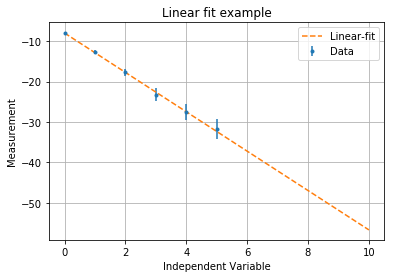

Problem 2 complete


In [2]:
print("Part (a) is meant to build the algorithm")

#Expectation value of the nth-power of the x-array weighted by the inverse of the y-variance
def u(x, sig, n):
    tp = x**n
    bt = sig**2
    ary = tp/bt
    return np.sum(ary)

#Expectation value of the inner product between the the nth-power of the x-array and the y-array weighted by the inverse of the y-variance
def w(x, y, sig, n):
    tp = y*(x**n)
    bt = sig**2
    ary = tp/bt
    return np.sum(ary)
    
#Linear-fit algorithm using least-squares method
def linfit(x_data, y_data, y_error):
    u_0 = u(x_data, y_error, 0)
    u_1 = u(x_data, y_error, 1)
    u_2 = u(x_data, y_error, 2)
    
    w_0 = w(x_data, y_data, y_error, 0)
    w_1 = w(x_data, y_data, y_error, 1)
    w_2 = w(x_data, y_data, y_error, 2)
    
    D = (u_0 * u_2) - (u_1 ** 2)
    stnd_1 = (u_0 * w_1) - (w_0 * u_1)
    stnd_2 = (u_2 * w_0) - (w_1 * u_1)
    
    slope = stnd_1/D
    var_sl = u_0/D
    
    y_intr = stnd_2/D
    var_yt = u_2/D
    
    return np.array([slope, y_intr, var_sl, var_yt])
    
print("Part (a) complete")
    
    
print("Part (b) is shall test the algorithm using the sample data below:")

x = np.array([ 0., 1., 2., 3., 4., 5.])
y = np.array([ -8.0, -12.8, -17.7, -23.3, -27.6, -31.7])
yerr = np.array([ 0.2, -0.5, -0.9, -1.6, -2.0, -2.5])

print('x data points: %s'%x)
print('y data points: %s'%y)
print('y-error data points: %s'%yerr)

rs = linfit(x, y, yerr)
print("results")
print("slope = %.3f +/- %.3f"%(rs[0], rs[2]**0.5))
print("intercept = %.3f +/- %.3f"%(rs[1], rs[3]**0.5))

print("Part (b) complete")
print('')
print("Part (c) we shall plot our results")
import matplotlib.pyplot as plt

fig = plt.figure()
plt.errorbar(x, y, yerr = yerr, fmt='.', label='Data')
smpl_x = np.linspace(0, 10, 31)

f_x = rs[1] + (rs[0] * smpl_x)
plt.plot(smpl_x, f_x, '--', label='Linear-fit')
plt.grid(True)
plt.title('Linear fit example')
plt.legend()
plt.xlabel('Independent Variable')
plt.ylabel('Measurement')
plt.show()
fig.savefig('Linear_fit_ex.png')

print("Problem 2 complete")

### Problem 3

In this problem we shall work with the impedance function of an RLC circuit. Provided that the complex impedance of a circuit for a given frequency is:
$$z(\omega) = \left(\frac{1}{R} + \frac{1}{i\omega L} + i\omega C \right)^{-1}$$

Let us now define the impedance as function using python:

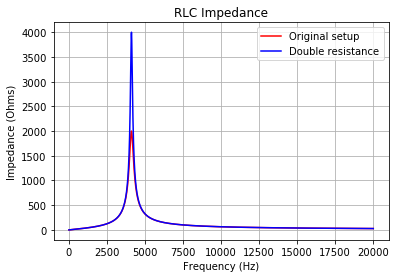

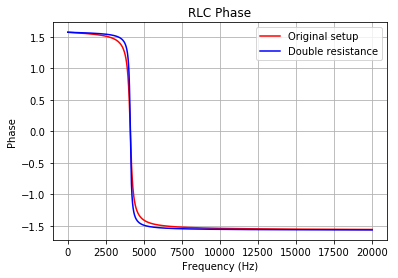

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def z(f, R, L, C):
    w = 2*np.pi*f
    R_ar = np.repeat(R, len(f))
    L_ar = np.repeat(L, len(f))
    C_ar = np.repeat(C, len(f))
    
    a = 1/R_ar
    b = 1/(1j*w*L_ar)
    c = 1j*w*C_ar
    
    return 1/(a + b + c)

freq = np.linspace(1, 20000, 10000)
mag1 = abs(z(freq, 2000, 0.005, 300e-9))
mag2 = abs(z(freq, 4000, 0.005, 300e-9))

fig1 = plt.figure()
plt.plot(freq, mag1, 'r-', label='Original setup')
plt.plot(freq, mag2, 'b-', label='Double resistance')
plt.grid(True)
plt.title('RLC Impedance')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance (Ohms)')
plt.show()
fig1.savefig('RLC_magnitude_impedance.png')

phas1 = np.angle(z(freq, 2000, 0.005, 300e-9))
phas2 = np.angle(z(freq, 4000, 0.005, 300e-9))

fig2 = plt.figure()
plt.plot(freq, phas1, 'r-', label='Original setup')
plt.plot(freq, phas2, 'b-', label='Double resistance')
plt.grid(True)
plt.title('RLC Phase')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.show()
fig2.savefig('RLC_phase.png')

From the figures provided we may note that the magnitude impedance resonance peak scales by a factor of 2 when the resistance is doubled. The phase shows no chance in scale or translation between the two different data sets, yet we may note that the corners of the plateau sharpen as the resistance is doubled.

### Problem 4

Now we are going to make a simple number theory algorithm to build a list of prime numbers from 1 to n, where n is a given integer. With the following code below we may be able to track relations between prime numbers, but it might take an infinite amount of time before it provides a notable trace that we may parameterize.

In [4]:
def prime(n):
    build = [1,2]
    for s in range(2, n + 1):
        test = True
        #print(s)
        for y in build[1:]:
            state = s%y
            if state == 0:
                test = False
        #print(test)       
        if bool(test)==True:
            build.append(s)
    return build

prime(100)

[1,
 2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

This here is the list of primes from 1 to 100. The only problem with this algorithm is that the compuation time grows exponentially the higher n is.

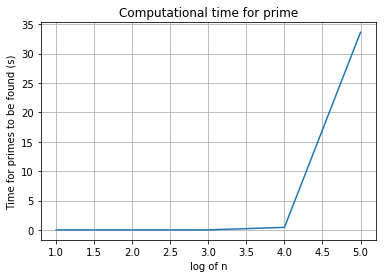

In [12]:
import timeit as tmt
import time
import numpy as np
import matplotlib.pyplot as plt

test_n = np.arange(1,6, 1)
time_int = np.empty(len(test_n))


def prime(n):
    build = [1,2]
    for s in range(2, n + 1):
        test = True
        #print(s)
        for y in build[1:]:
            state = s%y
            if state == 0:
                test = False
        #print(test)       
        if bool(test)==True:
            build.append(s)
    return build


for s in test_n:
    start = time.time()
    g = prime(int(10**s))
    end = time.time()
    interval = end - start
    time_int[s-1] = interval
    

fig = plt.figure()
plt.plot(test_n, time_int)
plt.grid(True)
plt.title('Computational time for prime')
plt.xlabel('log of n')
plt.ylabel('Time for primes to be found (s)')
plt.show()
    

### Bonus

This will be a breif section into exploiting matplotlib modules in order to recreate the spectral lines of the Helium spectra.

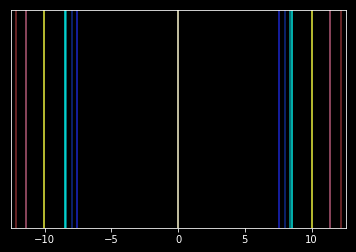

In [2]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

Z0 = {'label':r'ZZ',    'degrees':0.  , 'arcmins':0.,   'color':r'#FFFAD2' , 'intensity':1.,  'order':0 }
A0 = {'label':r'$A_R$', 'degrees':7.5 , 'arcmins':5.,   'color':r'#2231ff' , 'intensity':.8,  'order':1 }
A1 = {'label':r'$A_L$', 'degrees':-7.5, 'arcmins':-5.,  'color':r'#2231ff' , 'intensity':.8,  'order':1 }
B0 = {'label':r'$B_R$', 'degrees':7.5 , 'arcmins':29.,  'color':r'#1845e6' , 'intensity':.6,  'order':1 }
B1 = {'label':r'$B_L$', 'degrees':-7.5, 'arcmins':-29., 'color':r'#1845e6' , 'intensity':.6,  'order':1 }
C0 = {'label':r'$C_R$', 'degrees':8.  , 'arcmins':23.,  'color':r'#07d3De' , 'intensity':.7,  'order':1 }
C1 = {'label':r'$C_L$', 'degrees':-8. , 'arcmins':-23., 'color':r'#07d3De' , 'intensity':.7,  'order':1 }
D0 = {'label':r'$D_R$', 'degrees':8.5 , 'arcmins':0.,   'color':r'#02fffa' , 'intensity':.9,  'order':1 }
D1 = {'label':r'$D_L$', 'degrees':-8.5, 'arcmins':-0.,  'color':r'#02fffa' , 'intensity':.9,  'order':1 }
E0 = {'label':r'$E_R$', 'degrees':10. , 'arcmins':1.,   'color':r'#FAFF41' , 'intensity':.95, 'order':1 }
E1 = {'label':r'$E_L$', 'degrees':-10., 'arcmins':-1.,  'color':r'#FAFF41' , 'intensity':.95, 'order':1 }
F0 = {'label':r'$F_R$', 'degrees':11. , 'arcmins':24.,  'color':r'#FF80A9' , 'intensity':.7,  'order':1 }
F1 = {'label':r'$F_L$', 'degrees':-11., 'arcmins':-24., 'color':r'#FF80A9' , 'intensity':.7,  'order':1 }
G0 = {'label':r'$G_R$', 'degrees':12. , 'arcmins':10.,  'color':r'#DE4C4F' , 'intensity':.6,  'order':1 }
G1 = {'label':r'$G_L$', 'degrees':-12., 'arcmins':-10., 'color':r'#DE4C4F' , 'intensity':.6,  'order':1 }

lines = [Z0,A0,A1,B0,B1,C0,C1,D0,D1,E0,E1,F0,F1,G0,G1]


plt.style.use('dark_background')

fig = plt.figure()
for data in lines:
    lb = data['label']
    loc = data['degrees'] + (data['arcmins']/60)
    c = data['color']
    ints = data['intensity']
    #spec_lin = ax.Axes(fig, )
    plt.axvline(x=loc, ymin=0, ymax=1, label=lb, color=c, alpha=ints)
    
plt.yticks([])
#plt.legend()
plt.show()